In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
df = pd.read_csv("Spotify.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


### Data Cleaning

In [3]:
# Checking null values
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [4]:
# Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [5]:
# Number of columns and rows
df.shape

(2017, 16)

In [6]:
# Name of all columns
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [7]:
# Number of columns
len(df.columns)

16

In [8]:
# Statistical Summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
acousticness,2017.0,0.187590,0.259989,0.000003,0.00963,0.063300,0.265,0.995
danceability,2017.0,0.618422,0.161029,0.122000,0.51400,0.631000,0.738,0.984
duration_ms,2017.0,246306.197323,81981.814219,16042.000000,200015.00000,229261.000000,270333.000,1004627.000
energy,2017.0,0.681577,0.210273,0.014800,0.56300,0.715000,0.846,0.998
instrumentalness,2017.0,0.133286,0.273162,0.000000,0.00000,0.000076,0.054,0.976
key,2017.0,5.342588,3.648240,0.000000,2.00000,6.000000,9.000,11.000
liveness,2017.0,0.190844,0.155453,0.018800,0.09230,0.127000,0.247,0.969
loudness,2017.0,-7.085624,3.761684,-33.097000,-8.39400,-6.248000,-4.746,-0.307
mode,2017.0,0.612295,0.487347,0.000000,0.00000,1.000000,1.000,1.000
speechiness,2017.0,0.092664,0.089931,0.023100,0.03750,0.054900,0.108,0.816


## Data Analysis

### Top 5 most Popular Artists

In [31]:
df1 = df.groupby("artist").count().sort_values("song_title",ascending = False)["song_title"][:5]
df1

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

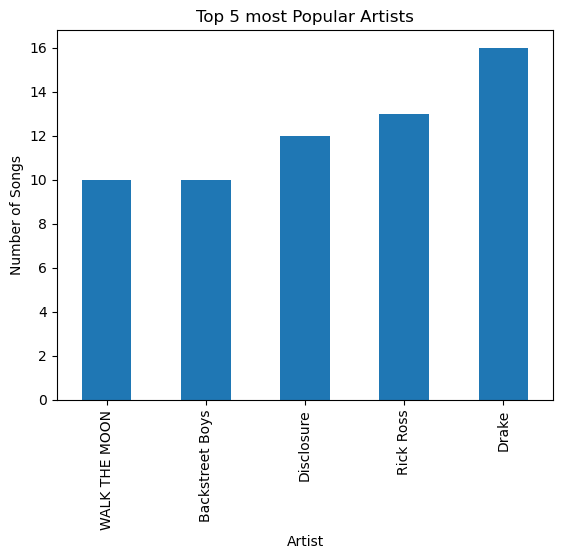

In [105]:
df1[::-1].plot(kind = "bar")
plt.title("Top 5 most Popular Artists")
plt.ylabel("Number of Songs")
plt.xlabel("Artist")
plt.show()

### Top 5 loudest Tracks

In [38]:
df2 = df[["loudness","song_title"]].sort_values("loudness", ascending = True)[:5].reset_index()
df2

,index,loudness,song_title
0,1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1,1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
2,1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
3,1531,-30.447,"I Was So Young, and You Were So Beautiful"
4,1549,-29.460,Eleanor


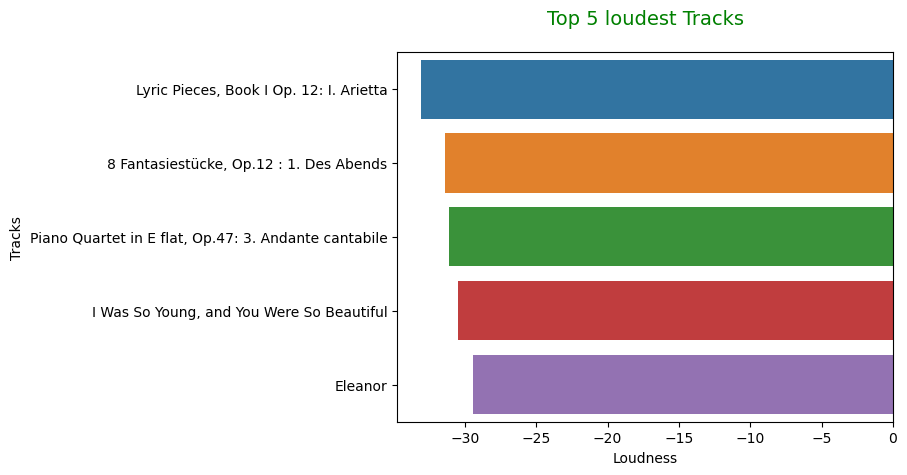

In [35]:
sns.barplot(x = df2.loudness, y = df2.song_title)
plt.title("Top 5 loudest Tracks",fontsize=14,color='g',pad = 20)
plt.xlabel("Loudness")
plt.ylabel("Tracks")
plt.show()

### Artist with most danceability song

In [39]:
df3 = df[["danceability","song_title","artist"]].sort_values("danceability", ascending = False)[:5].reset_index()
df3

,index,danceability,song_title,artist
0,1433,0.984,Flashwind - Radio Edit,Ben Remember
1,1901,0.967,SexyBack,Justin Timberlake
2,604,0.962,Check Me Out Like,Blaqstarr
3,32,0.959,Best Friend,Young Thug
4,1957,0.959,Ice Ice Baby,Vanilla Ice


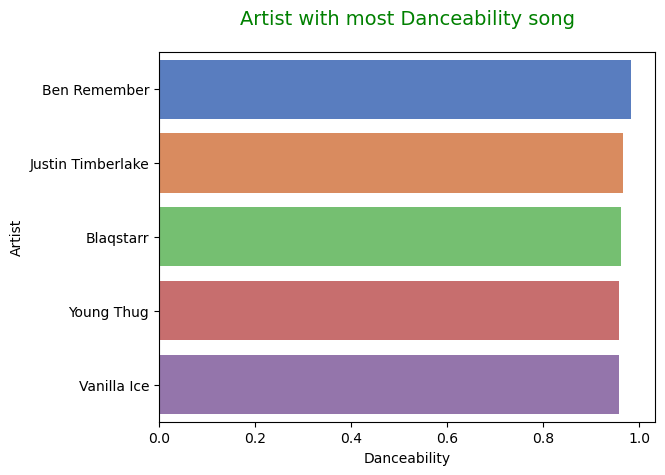

In [52]:
sns.barplot(x = df3.danceability, y = df3.artist,palette = "muted")
plt.title("Artist with most Danceability song",fontsize=14,color='g',pad = 20)
plt.xlabel("Danceability")
plt.ylabel("Artist")
plt.show()

### Top 5 instrumentalness tracks

In [55]:
df4 = df[["instrumentalness","song_title","artist"]].sort_values("instrumentalness", ascending = False)[:5].reset_index()
df4

,index,instrumentalness,song_title,artist
0,1313,0.976,Senseless Order,Signs of the Swarm
1,271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
2,1575,0.964,A Hundred Dreams from Now,Ray Bryant
3,1619,0.958,Raven,John Dahlbäck
4,725,0.957,Strandbar (disko),Todd Terje


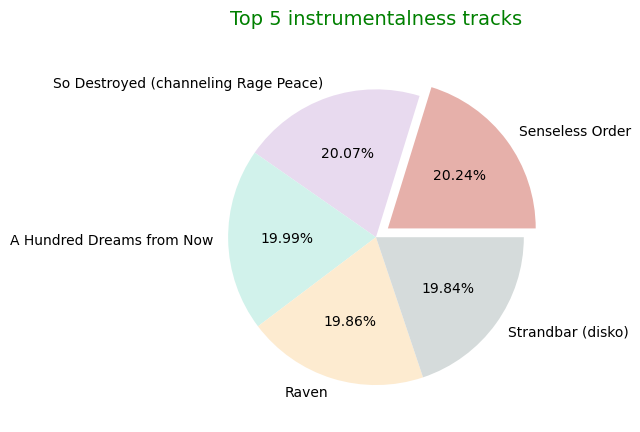

In [59]:
df4.plot(x = "song_title" , y = "instrumentalness",kind = "pie",
        labels = df4.song_title,
        autopct = '%0.2f%%',
        explode = [0.1,0,0,0,0],
        textprops={'fontsize':10,'color':'black'},
        colors=['#E6B0AA','#E8DAEF','#D1F2EB','#FDEBD0','#D5DBDB'] 
            ) 
plt.legend().set_visible(False)
plt.ylabel("")
plt.title('Top 5 instrumentalness tracks',fontsize=14,color='g',pad = 20)
plt.show()

### Multiple feature plots

In [80]:
df5 = ["acousticness", "danceability","duration_ms","energy",
       "instrumentalness",
       "speechiness", "tempo", "valence"]
df5

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'speechiness',
 'tempo',
 'valence']

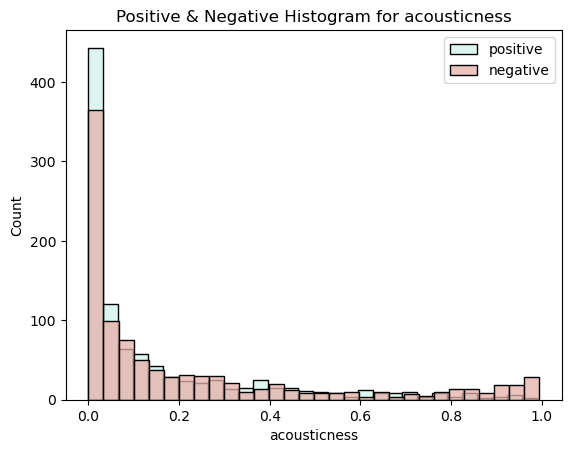

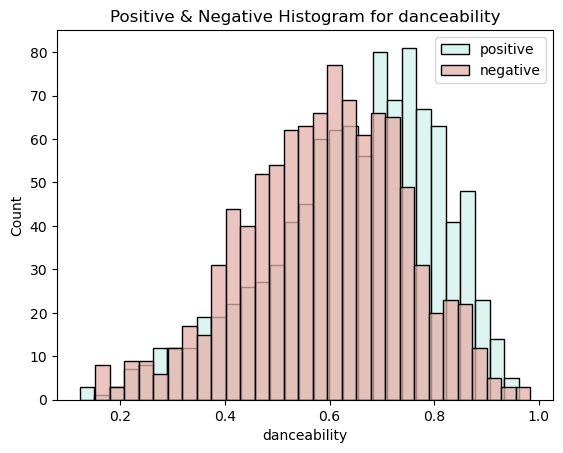

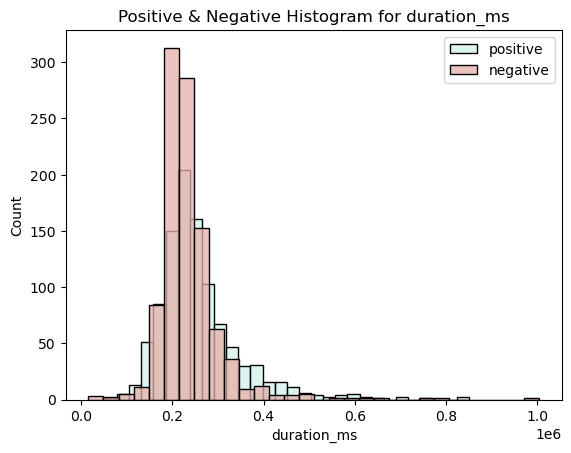

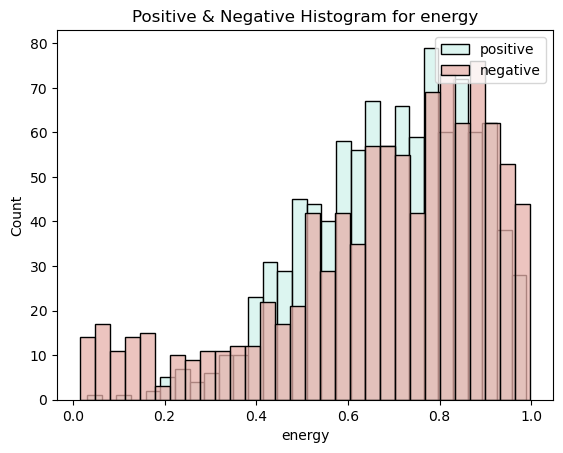

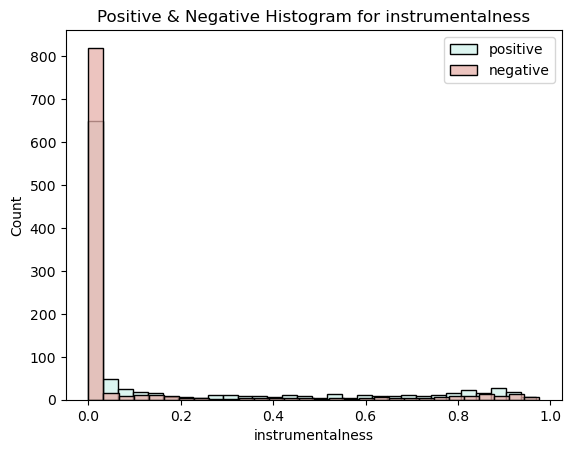

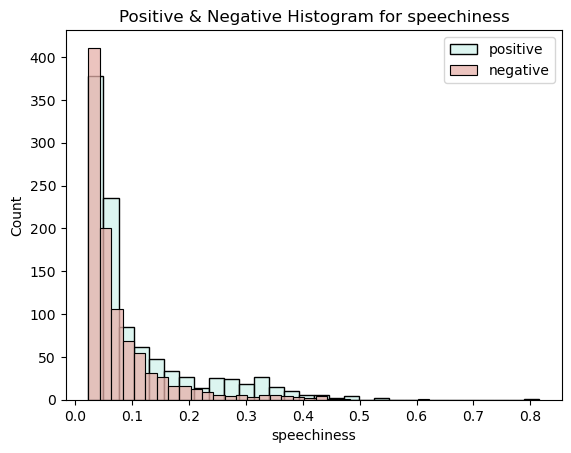

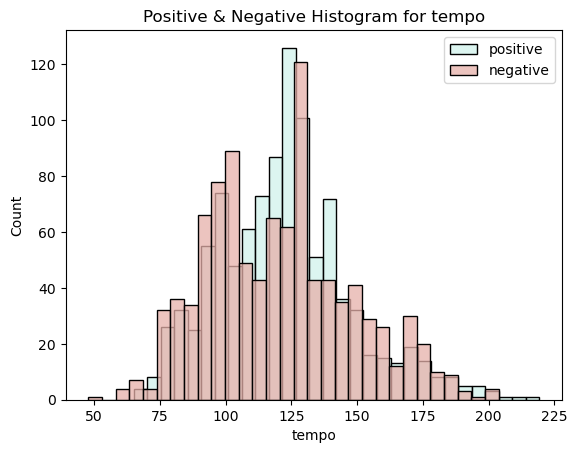

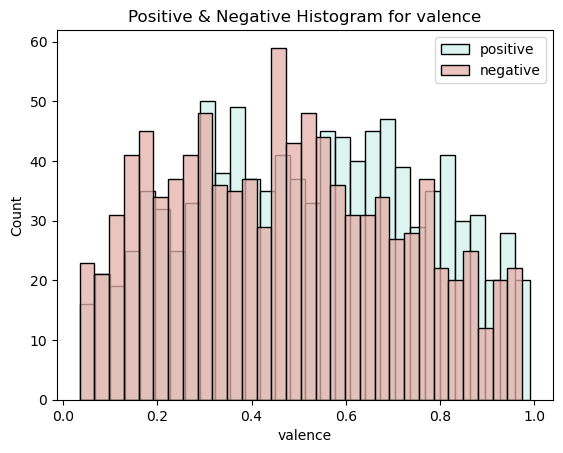

In [89]:
for feature_col in df5:
    positive = df[df["target"] == 1][feature_col]
    negative = df[df["target"] == 0][feature_col]
    
    sns.histplot(positive, bins = 30,label = "positive", color = "#D1F2EB" )
    sns.histplot(negative, bins = 30,label = "negative", color = "#E6B0AA")
    
    plt.legend(loc="upper right")
    plt.title(f"Positive & Negative Histogram for {feature_col}")
    plt.show()

### Top 10 Energetic Tracks

In [90]:
df.head()

Features,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [102]:
df6 = df[["energy","song_title","artist"]].sort_values("energy",ascending = False)[:10]
df6

Features,energy,song_title,artist
1299,0.998,No Absolution,Thy Art Is Murder
1322,0.997,Pitchblack,Walking Dead On Broadway
1297,0.994,A Darkened Gospel,A Wake in Providence
1347,0.993,Unanswered,Suicide Silence
2015,0.992,First Contact,Twin Moons
1680,0.992,Paranoia,A Day To Remember
1332,0.992,Beautiful Agony,Within The Ruins
1328,0.991,Down into the Abyss,Conjonctive
1681,0.990,Hated,Beartooth
1296,0.990,Black Colors,Victim Of Deception


C:\Users\DELL\AppData\Local\Temp\ipykernel_24392\2848846970.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(data=df6, x="song_title", y="energy",
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


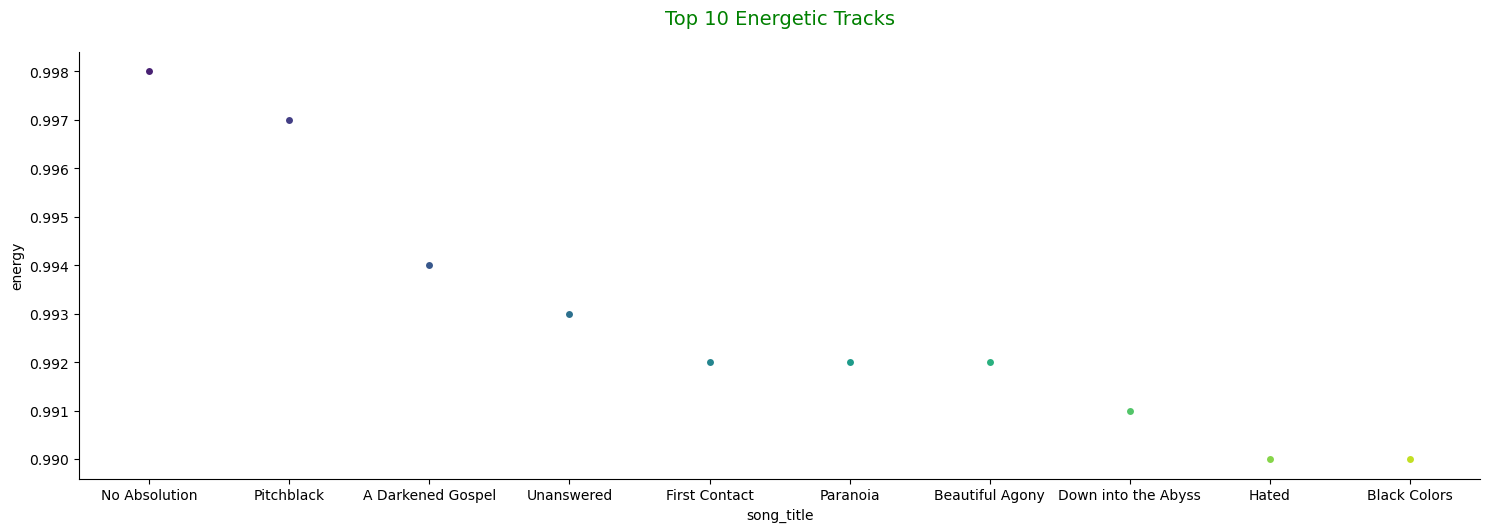

In [137]:
sns.catplot(data=df6, x="song_title", y="energy",
            kind='strip',
            aspect = 9/3,
            palette='viridis')
plt.title("Top 10 Energetic Tracks", fontsize=14,color='g',pad = 20)
plt.show()